In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime 

In [2]:
data = pd.read_csv('data.csv')
data.shape

(9495235, 23)

In [3]:
# Our data has almost 10 million rows and 23 features. Viewing a sample
data.tail()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
9495230,16734072,2017,10,39,6,0,Subscriber,Female,2017-10-01 00:01:00,2017-10-01 00:12:00,...,220,Hampden Ct & Diversey Pkwy,41.932620,-87.642385,23.0,87,Racine Ave & Fullerton Ave,41.925563,-87.658404,19.0
9495231,16734071,2017,10,39,6,0,Subscriber,Male,2017-10-01 00:01:00,2017-10-01 00:12:00,...,220,Hampden Ct & Diversey Pkwy,41.932620,-87.642385,23.0,87,Racine Ave & Fullerton Ave,41.925563,-87.658404,19.0
9495232,16734070,2017,10,39,6,0,Subscriber,Male,2017-10-01 00:01:00,2017-10-01 00:15:00,...,289,Wells St & Concord Ln,41.912133,-87.634656,19.0,226,Racine Ave & Belmont Ave,41.939743,-87.658865,15.0
9495233,16734067,2017,10,39,6,0,Subscriber,Female,2017-10-01 00:00:00,2017-10-01 00:06:00,...,288,Larrabee St & Armitage Ave,41.918084,-87.643749,11.0,289,Wells St & Concord Ln,41.912133,-87.634656,19.0
9495234,16734066,2017,10,39,6,0,Subscriber,Female,2017-10-01 00:00:00,2017-10-01 00:12:00,...,135,Halsted St & 21st St,41.853780,-87.646650,11.0,129,Blue Island Ave & 18th St,41.857556,-87.661535,15.0


In [4]:
print (data.columns)

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')


# EXPLORATORY DATA  ANALYSIS

In [5]:
# Checking if all features have values
data.isnull().sum()

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dtype: int64

##### Lets create a date from the string datetime in the dataset. We will add this as the feature name 'sdate'. This will come from the date portion of the 'starttime' variable.

In [6]:
data['sdate'] = pd.to_datetime(data['starttime']).dt.date

##### Lets find the starting and ending day in our dataset

In [7]:
print ('First timepoint in the dataset', data['sdate'].min())
print ('Date timepoint in the dataset', data['sdate'].max())

First timepoint in the dataset 2014-01-01
Date timepoint in the dataset 2017-12-31


##### Lets analyse numbers of count of rides per day for a calender year. The goal here is to find some kind of trend that can tell us about the biking pattern in Chicago. We will perform the analysis for 2016 and 2017 and see monitor the graph from 1st Jan to 31st december for both years.

In [8]:
startdate2017 = data['sdate'] >= datetime.date(2017, 1, 1) 
enddate2017 = data['sdate'] <= datetime.date(2017, 12, 31)
startdate2016 = data['sdate'] >= datetime.date(2016, 1, 1) 
enddate2016 = data['sdate'] <= datetime.date(2016, 12, 31)

In [9]:
ets2016 = data[startdate2016 & enddate2016]
ets2017 = data[startdate2017 & enddate2017]

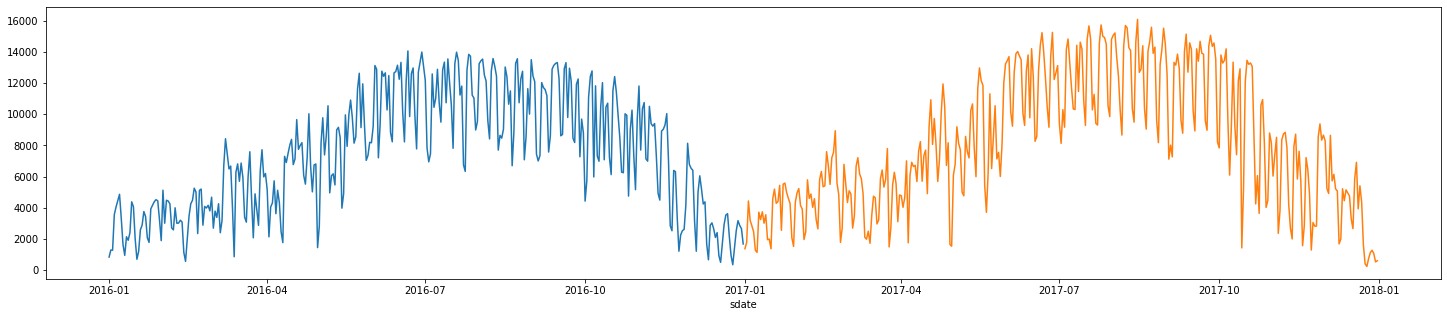

In [10]:
# Groupby to get the counts for each day and plot them in a trend line
ets2016.groupby('sdate').size().plot(figsize=(25,5))
ets2017.groupby('sdate').size().plot(figsize=(25,5))

#### Lets analyse the above graph.
##### The numbers start going up around March and peak in July.
##### The numbers stay roughly the same from July to September.
##### The numbers start dropping from September end dropping to a low around end of December/start Jan.
##### It is fairly obvious that weather doesn't permit outdoor activities in winter seasons in Chicago as it is very hostile.
##### Lets plot the average temperature as well for both calender years to confirm our theory.

In [11]:
temp16_17 = data[data['sdate'] > datetime.date(2016, 1, 1)].groupby('sdate').agg({'temperature': np.mean})

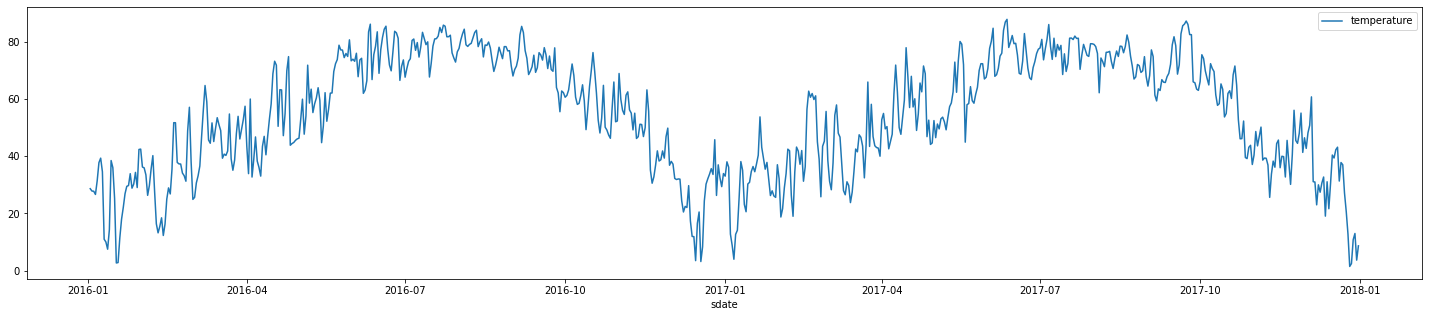

In [12]:
temp16_17.plot(figsize=(25,5))

#### The temperature plot backs up our assumption that bike sales are highly dependant on weather. This is essential becasue this tells us the following.
##### March-August is the time when sales peak, hence is the season for targeted marketing and rolling out the best promotions, advertisements etc.
##### This also tells up what months the bike company should have more bikes on the road to cope with the demand. 
##### March-August is also the month they should really focus on acquiring new members(subscribers).

#### It is valuable to run some aggregate numbers to see the target audience. We can do this by checking:
##### Numbers by gender
##### Numbers by membership

In [13]:
# Let find out the types of membership we have for the bike company.
data['usertype'].unique()

array(['Subscriber', 'Customer', 'Dependent'], dtype=object)

In [14]:
# So we have three usertypes, lets breakdown the numbers per usertype per year to see the growth per category over the years.
users_agg = data.groupby(['sdate', 'usertype']).size()
# We will get a pandas series in return
users_agg = users_agg.to_frame()
# Reset the index to remove '0' as the sole column
users_agg = users_agg.reset_index()
# Rename the columns
users_agg.columns = ['date', 'usertype', 'count']

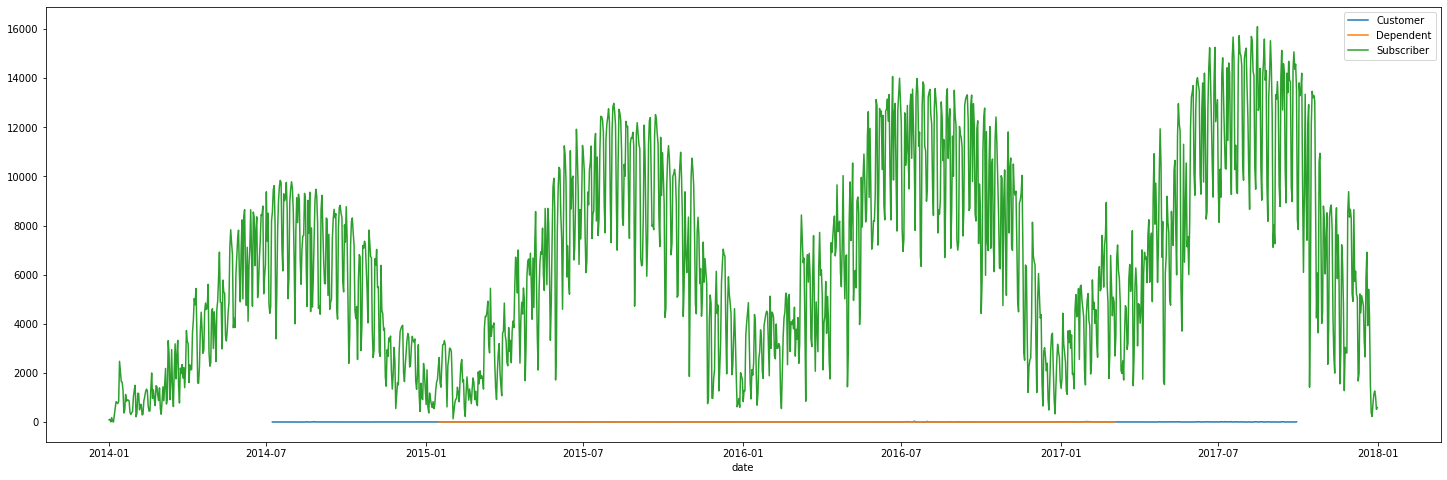

In [15]:
# Create a multi line plot mapping the growth of each usertype over years
fig, ax = plt.subplots()
for label, grp in users_agg.groupby('usertype'):
    grp.plot(x = 'date', y = 'count',ax = ax, label = label, figsize=(25,8))

##### The graph here indicates that the overwhelming majority of the people who rent the bikes are Subscribers.
##### The count of the Dependant and Customer are too low for a comparision.
##### We can also see an UPWARD trend in the number of subscribers, the peak is growing up year over year.
##### Lets back this up by looking at the actual numbers.

In [16]:
usercount = data.groupby(['usertype']).size()
usercount

usertype
Customer         1277
Dependent         178
Subscriber    9493780
dtype: int64

##### The number of Subscribers is truly large and large enough to ignore Customers and Dependants.
##### Lets have a look at the Male/Female breakdown.

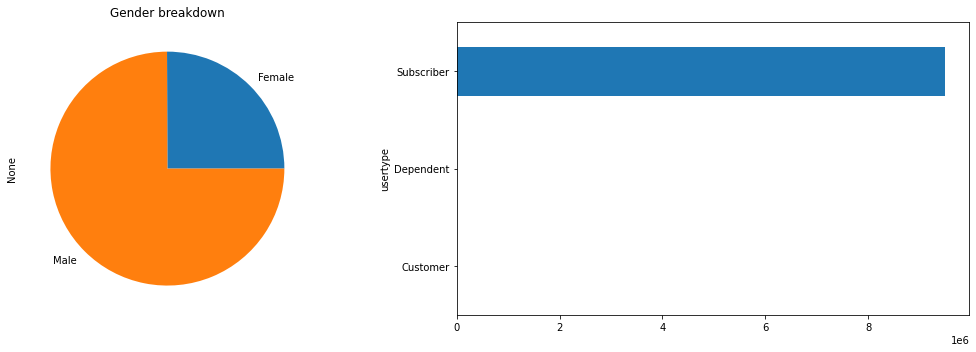

In [17]:
# Gender groupby
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))  # 1 row, 2 columns
g = data.groupby(['gender']).size()

g.plot(kind = 'pie', title = 'Gender breakdown', ax=ax1)
plt.ylabel("")
usercount.plot(kind = 'barh', ax=ax2)

plt.tight_layout()

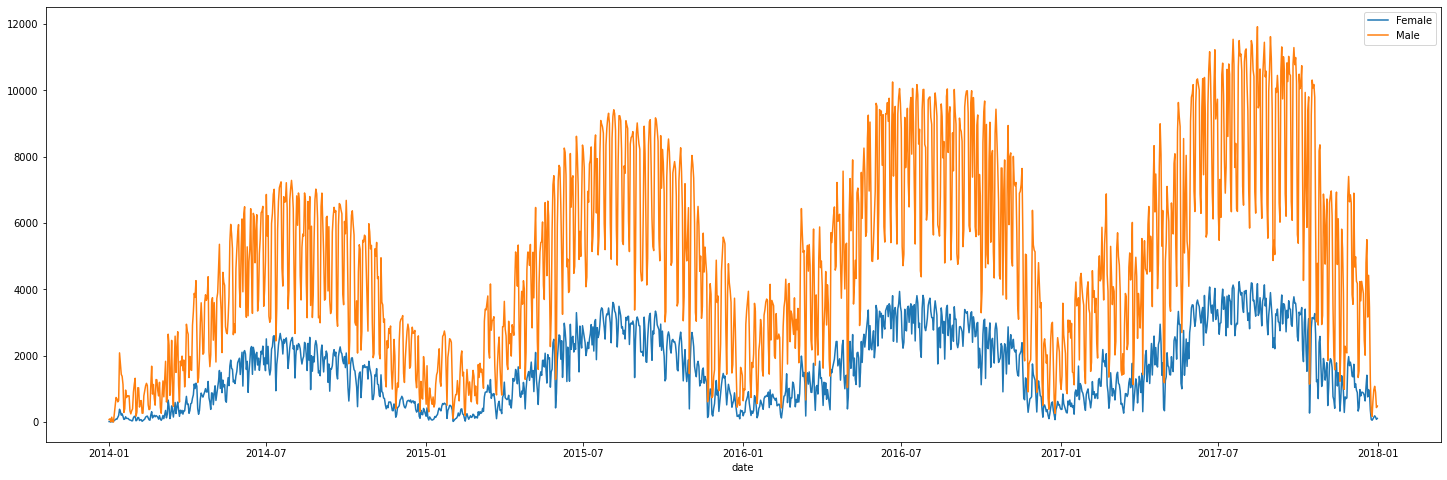

In [18]:
# We can observe that roughly 3 quarters of the bikers are male.
# We can do a similar analyssis to have alook at the trend for male/female users over the years.
gender_agg = data.groupby(['sdate', 'gender']).size()
gender_agg = gender_agg.to_frame()
gender_agg = gender_agg.reset_index()
gender_agg.columns = ['date', 'gender', 'count']
fig, ax = plt.subplots()
for label, grp in gender_agg.groupby('gender'):
    grp.plot(x = 'date', y = 'count',ax = ax, label = label, figsize=(25,8))

##### Lets have alook at the effect of temperature on the length of the ride.
##### I suspect that colder temperatures may reduce the sum of ride time duration.
##### We will groupby week number and month

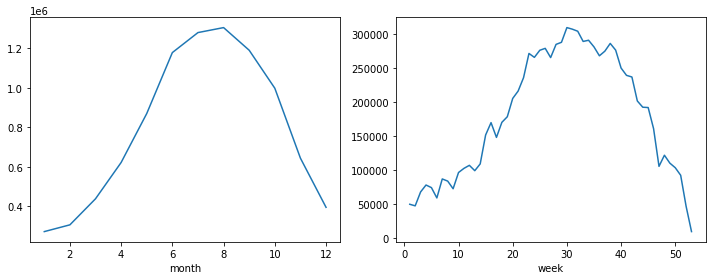

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
# Grouping median time of a ride by month.
ride_len_month = data.groupby('month')['tripduration'].count()
ride_len_week = data.groupby('week')['tripduration'].count()

ride_len_month.plot(ax=ax1)
ride_len_week.plot(ax=ax2)

plt.tight_layout()

##### This is as we expected, a hump in the season when the weather is mild. 
##### Lets see what times the rides are carried out. 
##### We want to group by the hour of the day and see which hours have the most rides initiated.

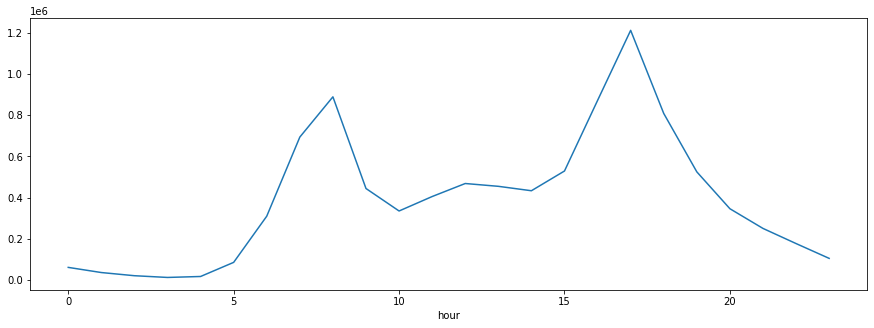

In [20]:
# Looking at the hourly distribution of rides
hour_dist = data.groupby(['hour']).size()
hour_dist.plot(figsize = (15, 5))

##### This points to an important pattern.
##### This is a bi-modal distribution because of obvious reasons.
##### The first peak lies between 6-9 AM around 8 AM. This is the time  when a lot of people leave for work/college etc.
##### The second peak is the time when a typical work day ends. 
##### The company can have lower rates during these times to attract more riders.
##### Lets have a look at how the event affects rides.

In [21]:
# Lets see what events we have in the events feature
data['events'].unique()

array(['tstorms', 'rain or snow', 'cloudy', 'not clear', 'clear',
       'unknown'], dtype=object)

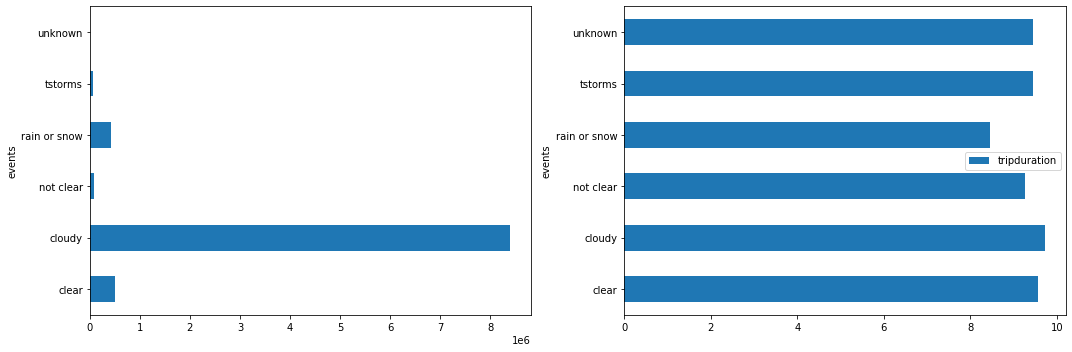

In [22]:
# We will see how the weather affects number of rides and median length of rides.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))  # 1 row, 2 columns
# Grouping median time of a ride by month.
weather = data.groupby(['events']).size()
weather_ride_len = data.groupby('events').agg({'tripduration': np.median})

weather.plot(kind = 'barh', ax = ax1)
weather_ride_len.plot(kind = 'barh', ax=ax2)

plt.tight_layout()

#### We can clearly see that the median(and average) ride duration for all seasons is nearly the same. This shows that the trip duration is not dependant on the weather. 
#### Although the season DOES affect the number of rides taken. Most people rent bikes during the cloudy season. 

#### Now lets look at the stations and station combinations.
#### This can tell us where the comapany need to keep the maximum bikes and thus can efficiently manage their inventory.

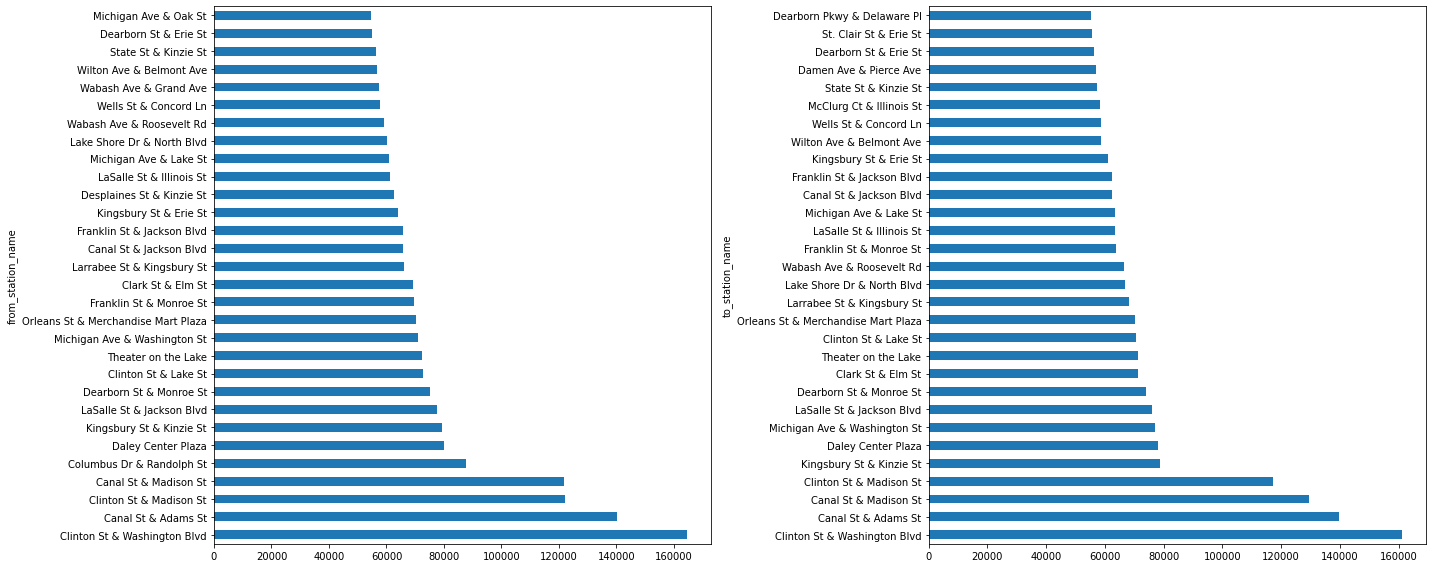

In [23]:
# Lets look at the top 30 stops where the most rides begin and end.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 8))  # 1 row, 2 columns
start = data.groupby(['from_station_name']).size().nlargest(30)
end = data.groupby(['to_station_name']).size().nlargest(30)

start.plot(kind = 'barh', ax = ax1)
end.plot(kind = 'barh', ax=ax2)

plt.tight_layout()

##### This station information can help the comapny strategically place bikes in the stations where they are most likely to be used.
##### This can also tell them where to put advertisements/charging stations.
##### In future when the sales go up, parking need to arranged for the bikes. This can help.

#### Lets find out the top origin-destination combination.

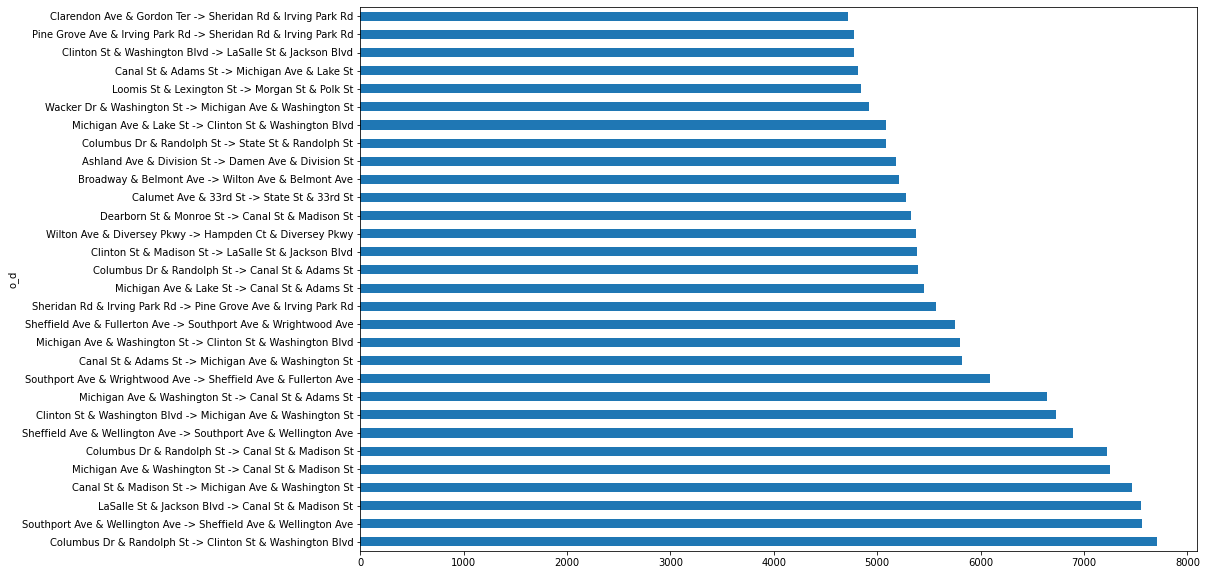

In [24]:
data["o_d"] = data["from_station_name"] + " -> " +data["to_station_name"]
max_od = data.groupby(['o_d']).size().nlargest(30)
max_od.plot(kind = 'barh', figsize = (15, 10))

##### As it is obvious from the above 2 charts, Clinton St & Washington Blvd, Canal St & Madison St, etc are some very important commerial areas for the company. 
##### This is where the company makes the most money.

# END OF EXPLORATORY ANALYSIS

# PREDICTING SALES IN THE FUTURE

In [25]:
from scipy import stats

In [26]:
# Lets select 2017 as our dataset. This will prevent a polynomial function as the trend repeats across years.
data = data[data['sdate'] >= datetime.date(2017, 1, 1)]
data

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,sdate,o_d
6537545,13518905,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:59:07,2017-04-01 00:13:24,...,41.885637,-87.641823,23.0,171,May St & Cullerton St,41.855136,-87.654127,11.0,2017-03-31,Clinton St & Lake St -> May St & Cullerton St
6537546,13518904,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:56:25,2017-04-01 00:00:21,...,41.890912,-87.626804,15.0,26,McClurg Ct & Illinois St,41.891020,-87.617300,31.0,2017-03-31,Wabash Ave & Grand Ave -> McClurg Ct & Illinoi...
6537547,13518903,2017,3,13,4,23,Subscriber,Female,2017-03-31 23:55:33,2017-04-01 00:01:21,...,42.015962,-87.668570,23.0,432,Clark St & Lunt Ave,42.009074,-87.674190,19.0,2017-03-31,Greenview Ave & Jarvis Ave -> Clark St & Lunt Ave
6537548,13518902,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:54:46,2017-03-31 23:59:34,...,41.893992,-87.629318,23.0,142,McClurg Ct & Erie St,41.894503,-87.617854,31.0,2017-03-31,Dearborn St & Erie St -> McClurg Ct & Erie St
6537549,13518901,2017,3,13,4,23,Subscriber,Female,2017-03-31 23:53:33,2017-04-01 00:00:28,...,41.921540,-87.653818,19.0,331,Halsted St & Blackhawk St (*),41.908537,-87.648627,20.0,2017-03-31,Sheffield Ave & Webster Ave -> Halsted St & Bl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495230,16734072,2017,10,39,6,0,Subscriber,Female,2017-10-01 00:01:00,2017-10-01 00:12:00,...,41.932620,-87.642385,23.0,87,Racine Ave & Fullerton Ave,41.925563,-87.658404,19.0,2017-10-01,Hampden Ct & Diversey Pkwy -> Racine Ave & Ful...
9495231,16734071,2017,10,39,6,0,Subscriber,Male,2017-10-01 00:01:00,2017-10-01 00:12:00,...,41.932620,-87.642385,23.0,87,Racine Ave & Fullerton Ave,41.925563,-87.658404,19.0,2017-10-01,Hampden Ct & Diversey Pkwy -> Racine Ave & Ful...
9495232,16734070,2017,10,39,6,0,Subscriber,Male,2017-10-01 00:01:00,2017-10-01 00:15:00,...,41.912133,-87.634656,19.0,226,Racine Ave & Belmont Ave,41.939743,-87.658865,15.0,2017-10-01,Wells St & Concord Ln -> Racine Ave & Belmont Ave
9495233,16734067,2017,10,39,6,0,Subscriber,Female,2017-10-01 00:00:00,2017-10-01 00:06:00,...,41.918084,-87.643749,11.0,289,Wells St & Concord Ln,41.912133,-87.634656,19.0,2017-10-01,Larrabee St & Armitage Ave -> Wells St & Conco...


#### Lets aim at predicting hourly sales in the future. This will help the company manage workforce and inventory.
#### For this, we first need to aggregate the sales at a daily level. Other feature will also be aggregated.

In [27]:
daily_agg = data.groupby(['sdate']).agg({'tripduration': np.median, 'temperature': np.mean, 'events': stats.mode})
daily_agg['events']

sdate
2017-01-01         ([cloudy], [1183])
2017-01-02          ([cloudy], [808])
2017-01-03         ([cloudy], [2491])
2017-01-04         ([cloudy], [3141])
2017-01-05         ([cloudy], [2458])
                       ...           
2017-12-27         ([cloudy], [1094])
2017-12-28    ([rain or snow], [648])
2017-12-29          ([cloudy], [538])
2017-12-30          ([cloudy], [498])
2017-12-31          ([cloudy], [558])
Name: events, Length: 365, dtype: object

##### I was going to add the mode of the event(weather), i.e what was the weather most likely during the bike rental for that day. But it returns a scipymode object with the count of the most frequent event. In many cases, the weather is bi and tri modal for that day. So I am going to ignore 'event.'

In [28]:
daily_agg = data.groupby(['sdate', 'hour']).agg({'tripduration': np.median, 'temperature': np.mean, 'year': np.size})
daily_agg = daily_agg.reset_index()
daily_agg.columns = ['date', 'hour', 'duration', 'avg_temp', 'count']
daily_agg.head()

,date,hour,duration,avg_temp,count
0,2017-01-01,0,11.050000,23.0,31
1,2017-01-01,1,10.500000,21.0,42
2,2017-01-01,2,4.641667,21.0,28
3,2017-01-01,3,12.416667,19.0,17
4,2017-01-01,4,8.583333,21.0,5


In [29]:
# Generate the date values from the date
daily_agg['day_of_week'] = pd.DatetimeIndex(daily_agg['date']).day_name()
daily_agg['month'] = pd.DatetimeIndex(daily_agg['date']).month        
daily_agg['year'] = pd.DatetimeIndex(daily_agg['date']).year
daily_agg['weeknum'] = pd.DatetimeIndex(daily_agg['date']).week

In [30]:
print (daily_agg.columns)
daily_agg

Index(['date', 'hour', 'duration', 'avg_temp', 'count', 'day_of_week', 'month',
       'year', 'weeknum'],
      dtype='object')


,date,hour,duration,avg_temp,count,day_of_week,month,year,weeknum
0,2017-01-01,0,11.050000,23.0,31,Sunday,1,2017,52
1,2017-01-01,1,10.500000,21.0,42,Sunday,1,2017,52
2,2017-01-01,2,4.641667,21.0,28,Sunday,1,2017,52
3,2017-01-01,3,12.416667,19.0,17,Sunday,1,2017,52
4,2017-01-01,4,8.583333,21.0,5,Sunday,1,2017,52
...,...,...,...,...,...,...,...,...,...
8719,2017-12-31,17,10.108333,7.0,38,Sunday,12,2017,52
8720,2017-12-31,18,10.050000,5.0,27,Sunday,12,2017,52
8721,2017-12-31,20,7.583333,1.9,19,Sunday,12,2017,52
8722,2017-12-31,22,6.650000,0.0,9,Sunday,12,2017,52


#### One-hot encoding
##### We have some categorical variables in the dataset. 
##### Hour, month, year, weeknum, day_of_week are categorical variables.

In [31]:
getdummies = ['hour', 'day_of_week', 'month', 'year', 'weeknum']
for each in getdummies:
    dummies = pd.get_dummies(daily_agg[each], prefix=each, drop_first=False)
    daily_agg = pd.concat([daily_agg, dummies], axis=1)

In [32]:
# Dataframe after one-hot encoding 
daily_agg

,date,hour,duration,avg_temp,count,day_of_week,month,year,weeknum,hour_0,...,weeknum_43,weeknum_44,weeknum_45,weeknum_46,weeknum_47,weeknum_48,weeknum_49,weeknum_50,weeknum_51,weeknum_52
0,2017-01-01,0,11.050000,23.0,31,Sunday,1,2017,52,1,...,0,0,0,0,0,0,0,0,0,1
1,2017-01-01,1,10.500000,21.0,42,Sunday,1,2017,52,0,...,0,0,0,0,0,0,0,0,0,1
2,2017-01-01,2,4.641667,21.0,28,Sunday,1,2017,52,0,...,0,0,0,0,0,0,0,0,0,1
3,2017-01-01,3,12.416667,19.0,17,Sunday,1,2017,52,0,...,0,0,0,0,0,0,0,0,0,1
4,2017-01-01,4,8.583333,21.0,5,Sunday,1,2017,52,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8719,2017-12-31,17,10.108333,7.0,38,Sunday,12,2017,52,0,...,0,0,0,0,0,0,0,0,0,1
8720,2017-12-31,18,10.050000,5.0,27,Sunday,12,2017,52,0,...,0,0,0,0,0,0,0,0,0,1
8721,2017-12-31,20,7.583333,1.9,19,Sunday,12,2017,52,0,...,0,0,0,0,0,0,0,0,0,1
8722,2017-12-31,22,6.650000,0.0,9,Sunday,12,2017,52,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# We have to drop the original columns that we encoded
drop = ['hour', 'day_of_week', 'month', 'year', 'weeknum', 'date']
daily_agg = daily_agg.drop(drop, axis=1)
daily_agg

,duration,avg_temp,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,weeknum_43,weeknum_44,weeknum_45,weeknum_46,weeknum_47,weeknum_48,weeknum_49,weeknum_50,weeknum_51,weeknum_52
0,11.050000,23.0,31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10.500000,21.0,42,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.641667,21.0,28,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,12.416667,19.0,17,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.583333,21.0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8719,10.108333,7.0,38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8720,10.050000,5.0,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8721,7.583333,1.9,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8722,6.650000,0.0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### We have to scale the numerical features in the dataset. The idea is to get the numerical features to a standard deviation of 1 and an expectation of 0.
##### The numerical features are: 'duration', 'avg_temp', 'count'

In [34]:
# Scaling the features.
numeric_features = ['duration', 'avg_temp', 'count']
scaled_features = {}
for each in numeric_features:
    mean, std = daily_agg[each].mean(), daily_agg[each].std()
    scaled_features[each] = [mean, std]
    daily_agg.loc[:, each] = (daily_agg[each] - mean)/std

In [35]:
# The dataframe after scaling
daily_agg

,duration,avg_temp,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,weeknum_43,weeknum_44,weeknum_45,weeknum_46,weeknum_47,weeknum_48,weeknum_49,weeknum_50,weeknum_51,weeknum_52
0,1.015862,-1.516266,-0.795377,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.743377,-1.618062,-0.766973,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-2.159000,-1.618062,-0.803124,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.692946,-1.719858,-0.831527,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.206192,-1.618062,-0.862513,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8719,0.549335,-2.330634,-0.777302,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8720,0.520435,-2.432430,-0.805706,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8721,-0.701619,-2.590214,-0.826363,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8722,-1.164018,-2.686920,-0.852184,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### We have to split the dataset into train, validation and testing datasets.
##### We will keep last 15 days for testing
##### Our target variable is the feature 'count', which is the hourly count of rides.

In [36]:
# Create last 15 days test set. 
test_set = daily_agg[-15*24:]

# Remove the test holdout from the data.
daily_agg = daily_agg[:-15*24]

# Separate the data into features and targets
y = ['count']
x, Y = daily_agg.drop(y, axis=1), daily_agg[y]
test_features, test_target = test_set.drop(y, axis=1), test_set[y]

print ("Features:", daily_agg.columns.values)

Features: ['duration' 'avg_temp' 'count' 'hour_0' 'hour_1' 'hour_2' 'hour_3'
 'hour_4' 'hour_5' 'hour_6' 'hour_7' 'hour_8' 'hour_9' 'hour_10' 'hour_11'
 'hour_12' 'hour_13' 'hour_14' 'hour_15' 'hour_16' 'hour_17' 'hour_18'
 'hour_19' 'hour_20' 'hour_21' 'hour_22' 'hour_23' 'day_of_week_Friday'
 'day_of_week_Monday' 'day_of_week_Saturday' 'day_of_week_Sunday'
 'day_of_week_Thursday' 'day_of_week_Tuesday' 'day_of_week_Wednesday'
 'month_1' 'month_2' 'month_3' 'month_4' 'month_5' 'month_6' 'month_7'
 'month_8' 'month_9' 'month_10' 'month_11' 'month_12' 'year_2017'
 'weeknum_1' 'weeknum_2' 'weeknum_3' 'weeknum_4' 'weeknum_5' 'weeknum_6'
 'weeknum_7' 'weeknum_8' 'weeknum_9' 'weeknum_10' 'weeknum_11'
 'weeknum_12' 'weeknum_13' 'weeknum_14' 'weeknum_15' 'weeknum_16'
 'weeknum_17' 'weeknum_18' 'weeknum_19' 'weeknum_20' 'weeknum_21'
 'weeknum_22' 'weeknum_23' 'weeknum_24' 'weeknum_25' 'weeknum_26'
 'weeknum_27' 'weeknum_28' 'weeknum_29' 'weeknum_30' 'weeknum_31'
 'weeknum_32' 'weeknum_33' 'week

In [37]:
# Creating a validation set of 60 days.
train_features, train_targets = x[:-60*24], Y[:-60*24]
val_features, val_targets = x[-60*24:], Y[-60*24:]

print ('Length of the training set : ', len(train_features))
print ('Length of the val set : ', len(val_features))

Length of the training set :  6924
Length of the val set :  1440


In [38]:
# Error metric: MSE error
MSE = lambda y, Y : np.mean((y-Y)**2)

### TRAINING

In [39]:
import NN

In [43]:
# Import the neural network from the file.
import sys

# Hyperparameters
iterations = 4000
learning_rate = 0.1
hidden_nodes = 4
output_nodes = 1

N_i = train_features.shape[1]
network = NN.NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}

# Train
for ii in range(iterations):
    # Go through a random batch of 32 records from the training data set
    batch = np.random.choice(train_features.index, size=32)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['count']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['count'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['count'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 100.0% ... Training loss: 0.116 ... Validation loss: 0.125

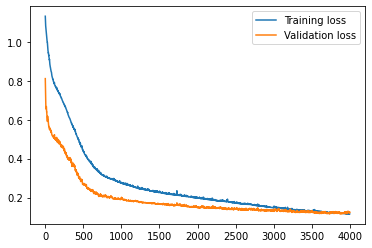

In [44]:
# Plotting the training v/s validation error
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

#### In general when the training error drops down slowly as compared to the validation error, it indicates that the networks had to learn on hard examples.

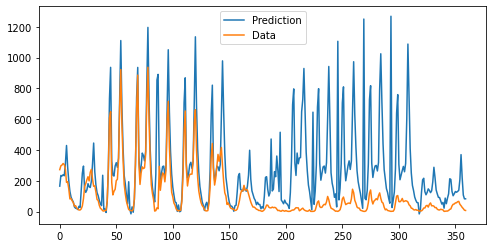

In [45]:
# Let's plot the results of our hourly predictions v/s hourly data.
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['count']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_target['count']*std + mean).values, label='Data')
ax.legend()

### The prediction is pretty good for the first 10 days in the test set.
#### The predictions get bad over time becuase the examples it has to learn on are tough.